In [198]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix, classification_report, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
# Helper Functions

def model_eval(mdl_local, X_local, y_local, bta = 1):
    y_pred = mdl_local.predict(X_local)
    print(f"F({bta}):", fbeta_score(y_local, y_pred, beta= bta))
    print("Precision :", precision_score(y_local, y_pred))
    print("Recall :", recall_score(y_local, y_pred))
    
def make_confusion_matrix(model, X_local, y_local, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_local)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_local, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['0', '1'],
           yticklabels=['0', '1']);
    plt.xlabel('prediction')
    plt.ylabel('actual')
    
def make_class_report(model, X_local, y_local, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_local)[:, 1] >= threshold)
    print(classification_report(y_local, y_predict))

In [200]:
df = pd.read_csv("loan_data_set.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [202]:
df.isna().sum()#thiss ccode to find sum of null values for each columns

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [203]:
df = df.fillna(df.mean())

In [204]:
df = df.drop('Loan_ID' , axis=1)

In [205]:
pd.value_counts(df['Self_Employed'])


No     500
Yes     82
Name: Self_Employed, dtype: int64

In [9]:
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [206]:
for_dummy = []
for_label = []
for col in df.select_dtypes(exclude=np.number).columns.to_list():
    num_uniq = df[col].nunique()
    if num_uniq < 5:
        for_label.append(col)
    else:
        for_dummy.append(col)

In [207]:
for_label

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [208]:
from sklearn.preprocessing import LabelEncoder
le_list = {}
for col in for_label:
    le_list[col] = LabelEncoder()
    
    df[col] = le_list[col].fit_transform(df[col])

In [209]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [56]:
pd.value_counts(df['Loan_Status'])


1    422
0    192
Name: Loan_Status, dtype: int64

In [210]:
df.loc[(df.Loan_Status == 1) , 'Loan_Status'] = 2
df.loc[(df.Loan_Status == 0) , 'Loan_Status'] = 1
df.loc[(df.Loan_Status == 2) , 'Loan_Status'] = 0

In [16]:
pd.value_counts(df['Loan_Status'])


1    422
0    192
Name: Loan_Status, dtype: int64

In [17]:
pd.value_counts(df['Property_Area'])


1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [211]:
df.loc[(df.Self_Employed == 2) , 'Self_Employed'] = 0

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


In [149]:
df.Gender.unique()

array([1, 0, 2])

In [213]:
X = df.drop("Loan_Status", axis="columns")
y = df["Loan_Status"]

In [151]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [152]:
y

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    1
Name: Loan_Status, Length: 614, dtype: int32

<AxesSubplot:>

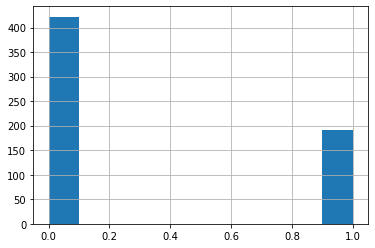

In [153]:
y.hist()

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=47)

### Logistic Regression

In [273]:
model = LogisticRegression()
model.fit(X_train, y_train)


print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

model_eval(model, X_test, y_test)

0.814663951120163
0.8130081300813008
F(1): 0.5660377358490566
Precision : 0.9375
Recall : 0.40540540540540543


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [261]:
# Expr2: with scaling (standard scaler or minmax scaler)
ss = StandardScaler()

X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

# Modeling
model = LogisticRegression()
model.fit(X_train_std, y_train)
print(model.score(X_train_std, y_train))
print(model.score(X_test_std, y_test))
model_eval(model, X_test_std, y_test)

0.8085539714867617
0.8130081300813008
F(1): 0.5660377358490566
Precision : 0.9375
Recall : 0.40540540540540543


In [262]:
mm = MinMaxScaler()

X_train_mm = mm.fit_transform(X_train)
X_test_mm = mm.transform(X_test)

# Modeling
model = LogisticRegression()
model.fit(X_train_mm, y_train)
print(model.score(X_train_mm, y_train))
print(model.score(X_test_mm, y_test))
model_eval(model, X_test_mm, y_test)

0.8085539714867617
0.8130081300813008
F(1): 0.5660377358490566
Precision : 0.9375
Recall : 0.40540540540540543


In [263]:
model = LogisticRegression()
parms = {"penalty":['l2','l1'],"C" : np.arange(0.1,3,0.2),"fit_intercept":[True, False]}

custom_scorer = make_scorer(fbeta_score, beta=1)

gs_cv = GridSearchCV(model, param_grid = parms, n_jobs=-1, cv=10, verbose=10, scoring=custom_scorer)
gs_cv.fit(X_train, y_train)
print(gs_cv.best_score_)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
0.5773393014308346


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.54513099        nan 0.53820458        nan 0.56844776        nan
 0.55773347        nan 0.55773347        nan 0.57215358        nan
 0.56189065        nan 0.55496424        nan 0.56821476        nan
 0.55263091        nan 0.55718931        nan 0.55016937        nan
 0.56411572        nan 0.56026624        nan 0.56411572        nan
 0.56272777        nan 0.55816937        nan 0.53049469        nan
 0.56980307        nan 0.56142212        nan 0.55952265        nan
 0.57032308        nan 0.56588699        nan 0.5525027         nan
 0.56375545        nan 0.54287666        nan 0.55819468        nan
 0.56696058        nan 0.5773393         nan 0.56588699        nan]
  warnings.warn(
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS RE

In [264]:
gs_cv.best_params_

{'C': 2.900000000000001, 'fit_intercept': True, 'penalty': 'l2'}

In [265]:
best_model = gs_cv.best_estimator_

In [267]:
print(best_model.score(X_train, y_train))
print(best_model.score(X_test, y_test))

model_eval(best_model, X_test, y_test)

0.8167006109979633
0.8130081300813008
F(1): 0.5660377358490566
Precision : 0.9375
Recall : 0.40540540540540543


In [268]:
model_eval(best_model, X_test, y_test, bta=1)

F(1): 0.5660377358490566
Precision : 0.9375
Recall : 0.40540540540540543


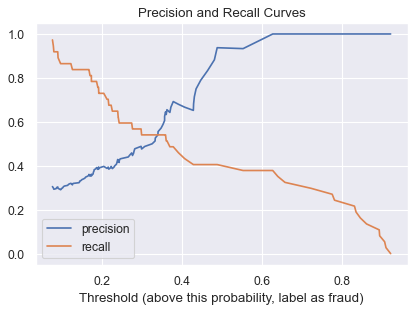

In [274]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, best_model.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

In [115]:
from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(best_model,X_test, y_test, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [271]:
interactive(lambda threshold: make_class_report(best_model,X_test, y_test, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

<AxesSubplot:>

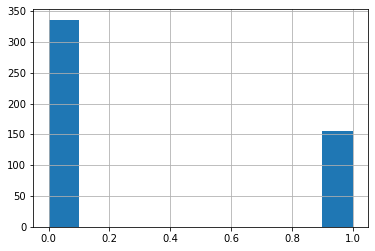

In [75]:
y_train.hist()

In [75]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [76]:
import imblearn.over_sampling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score

In [77]:
#SMOTE
from imblearn.over_sampling import RandomOverSampler,SMOTE

model = LogisticRegression()

smt=SMOTE(random_state=42)
X_tr_smt, y_tr_smt =smt.fit_resample (X_train, y_train)

model.fit (X_tr_smt, y_tr_smt)
model_eval(model, X_test, y_test)

F(1): 0.48484848484848486
Precision : 0.5517241379310345
Recall : 0.43243243243243246


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

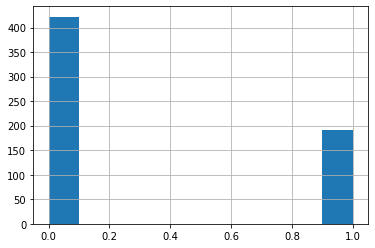

In [87]:
y.hist()

<AxesSubplot:>

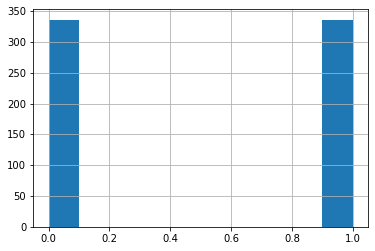

In [78]:
y_tr_smt.hist()

In [79]:
#UNDER

from imblearn.under_sampling import RandomUnderSampler

urs=RandomUnderSampler(random_state=42)
X_tr_urs, y_tr_urs =urs.fit_resample (X_train, y_train)
# ratio = {0:1,2}
X_tr_smt, y_tr_smt =urs.fit_resample (X_tr_urs, y_tr_urs )

model.fit (X_tr_smt, y_tr_smt)

model_eval (model, X_test, y_test)

F(1): 0.5217391304347827
Precision : 0.5625
Recall : 0.4864864864864865


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:

from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier

rus=RandomUnderSampler(sampling_strategy="auto", random_state=42)

X_tr_usf, y_tr_smt =rus.fit_resample (X_train, y_train)
rf = LogisticRegression()

rf.fit (X_tr_usf, y_tr_smt)
print("Train =")
model_eval (rf, X_tr_usf, y_tr_smt)
print("Test =")
model_eval (rf, X_test, y_test)

Train =
F(1): 0.6692015209125475
Precision : 0.8148148148148148
Recall : 0.567741935483871
Test =
F(1): 0.5217391304347827
Precision : 0.5625
Recall : 0.4864864864864865


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [278]:

from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.over_sampling import RandomOverSampler
# expr with random over sampling
#model = LogisticRegression()
#ros = randomOverSampler(random_state=42)
ros = imblearn.over_sampling.RandomOverSampler(random_state=42) 
X_tr_rs, y_tr_rs = ros.fit_resample(X_train, y_train)



best_model.fit(X_tr_rs, y_tr_rs)

print('Simple Logistic Regression; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, best_model.predict(X_test)), roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]))) 
print("train:",best_model.score(X_tr_rs,y_tr_rs))
print("test:",best_model.score(X_test,y_test))
model_eval(best_model, X_test, y_test)

Simple Logistic Regression; Test F1: 0.556, Test AUC: 0.696
train: 0.7247023809523809
test: 0.7398373983739838
F(1): 0.5555555555555556
Precision : 0.5714285714285714
Recall : 0.5405405405405406


In [254]:
# expr with random under sampling
#model = LogisticRegression(max_iter=500)
#ros = randomOverSampler(random_state=42)
rus = imblearn.under_sampling.RandomUnderSampler(random_state=42) 
X_tr_rs, y_tr_rs = rus.fit_resample(X_train, y_train)



best_model.fit(X_tr_rs, y_tr_rs)

print('Simple Logistic Regression; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, best_model.predict(X_test)), roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]))) 
print("train:",best_model.score(X_tr_rs,y_tr_rs))
print("test:",best_model.score(X_test,y_test))
model_eval(best_model, X_test, y_test)

Simple Logistic Regression; Test F1: 0.553, Test AUC: 0.707
train: 0.7161290322580646
test: 0.7235772357723578
F(1): 0.5526315789473685
Precision : 0.5384615384615384
Recall : 0.5675675675675675


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [255]:
# expr with random under sampling
#model = LogisticRegression(C = 0.5000000000000001)
#ros = randomOverSampler(random_state=42)
smote = imblearn.over_sampling.SMOTE(random_state=42) 
X_tr_rs, y_tr_rs = smote.fit_resample(X_train, y_train)



best_model.fit(X_tr_rs, y_tr_rs)
print("train:",best_model.score(X_tr_rs,y_tr_rs))
print("test:",best_model.score(X_test,y_test))
model_eval(best_model, X_test, y_test)

train: 0.7619047619047619
test: 0.7154471544715447
F(1): 0.5070422535211269
Precision : 0.5294117647058824
Recall : 0.4864864864864865


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
Simple Logistic Regression; Test F1: 0.842, Test AUC: 0.724
train: 0.7245508982035929
test: 0.7642276422764228
F(1): 0.8415300546448087
Precision : 0.8105263157894737
Recall : 0.875

### Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier 

In [89]:
decisiontree = DecisionTreeClassifier(random_state=42, min_samples_leaf=8)

In [90]:
decisiontree.fit(X_train, y_train)
print(f'Train score: {decisiontree.score(X_train, y_train)}')
print(f'Test score: {decisiontree.score(X_test, y_test)}')

Train score: 0.8309572301425662
Test score: 0.7317073170731707


In [91]:
model = DecisionTreeClassifier()
params = {'max_depth' : [3, 5, 7, 8, 11, 12],'min_samples_split' : [2, 3, 5, 9], 'criterion' : ["gini", "entropy"]}

gs_dt = GridSearchCV(model, param_grid = params, n_jobs=-1, cv=10, verbose=10)
gs_dt.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 8, 11, 12],
                         'min_samples_split': [2, 3, 5, 9]},
             verbose=10)

In [92]:
## get cross validated train score & best parameters
print(gs_dt.best_score_)
print(gs_dt.best_params_)

0.8044897959183673
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}


In [93]:
## saved tuned model for future use 
tuned_dt = gs_dt.best_estimator_

In [94]:
## get train & test scores
print(f'Train score: {tuned_dt.score(X_train, y_train)}')
print(f'Test score: {tuned_dt.score(X_test, y_test)}')

Train score: 0.814663951120163
Test score: 0.7560975609756098


### Random Forest


In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
randomforest = RandomForestClassifier(n_estimators=500, random_state=42, min_samples_leaf=8)

In [97]:
randomforest.fit(X_train, y_train)
print(f'Train score: {randomforest.score(X_train, y_train)}')
print(f'Test score: {randomforest.score(X_test, y_test)}')
model_eval(randomforest, X_test, y_test)

Train score: 0.8126272912423625
Test score: 0.8130081300813008
F(1): 0.5660377358490566
Precision : 0.9375
Recall : 0.40540540540540543


In [98]:
model = RandomForestClassifier()
params = {'max_depth' : [3, 5, 7, 8, 11, 12],'min_samples_split' : [2, 3, 5, 9], 'criterion' : ["gini", "entropy"],
          'n_estimators' : [10, 20, 40, 50, 70], 'max_features' : ["auto", "sqrt", "log2"]}

gs_rf = GridSearchCV(randomforest, param_grid = params, n_jobs=-1, cv=10, verbose=10)
gs_rf.fit(X_train, y_train)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(min_samples_leaf=8,
                                              n_estimators=500,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 8, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 5, 9],
                         'n_estimators': [10, 20, 40, 50, 70]},
             verbose=10)

In [104]:
## get cross validated train score & best parameters
print(gs_rf.best_score_)
print(gs_rf.best_params_)

0.808530612244898
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 10}


In [105]:
## saved tuned model for future use 
tuned_rf = gs_rf.best_estimator_

In [106]:
## get train & test scores
print(f'Train score: {tuned_rf.score(X_train, y_train)}')
print(f'Test score: {tuned_rf.score(X_test, y_test)}')
model_eval(tuned_rf, X_test, y_test)

Train score: 0.8085539714867617
Test score: 0.8130081300813008
F(1): 0.5660377358490566
Precision : 0.9375
Recall : 0.40540540540540543


### Naive Bayes

In [215]:
from sklearn.naive_bayes import GaussianNB

In [217]:
nb = GaussianNB()

In [218]:
nb.fit(X_train, y_train)
print(f'Train score: {nb.score(X_train, y_train)}')
print(f'Test score: {nb.score(X_test, y_test)}')
model_eval(nb, X_test, y_test)

Train score: 0.7942973523421588
Test score: 0.8130081300813008
F(1): 0.5964912280701754
Precision : 0.85
Recall : 0.4594594594594595


In [219]:
from sklearn.naive_bayes import MultinomialNB

In [220]:
nb1 = MultinomialNB()
nb1.fit(X_train, y_train)
print(f'Train score: {nb1.score(X_train, y_train)}')
print(f'Test score: {nb1.score(X_test, y_test)}')
model_eval(nb1, X_test, y_test)

Train score: 0.4989816700610998
Test score: 0.45528455284552843
F(1): 0.29473684210526313
Precision : 0.2413793103448276
Recall : 0.3783783783783784


In [222]:
from sklearn.naive_bayes import BernoulliNB

In [225]:
nb2 = BernoulliNB()
nb2.fit(X_train, y_train)
print(f'Train score: {nb2.score(X_train, y_train)}')
print(f'Test score: {nb2.score(X_test, y_test)}')
model_eval(nb2, X_test, y_test)

Train score: 0.8085539714867617
Test score: 0.8130081300813008
F(1): 0.5660377358490566
Precision : 0.9375
Recall : 0.40540540540540543


### SVM

In [102]:
from sklearn.svm import SVC
from sklearn import svm

In [103]:
svc_ = svm.SVC()
#svm.LinearSVC()
svc_.fit(X_train, y_train)
print(f'Train score: {svc_.score(X_train, y_train)}')
print(f'Test score: {svc_.score(X_test, y_test)}')
model_eval(svc_, X_test, y_test)

Train score: 0.6883910386965377
Test score: 0.6991869918699187
F(1): 0.0
Precision : 0.0
Recall : 0.0


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN

In [216]:
from sklearn.neighbors import KNeighborsClassifier

In [217]:
### KNN
knn = KNeighborsClassifier()
knn.fit(X_train_std, y_train)
print(f'Train score: {knn.score(X_train_std, y_train)}')
print(f'Test score: {knn.score(X_test_std, y_test)}')

model_eval(knn, X_test_std, y_test)

Train score: 0.8228105906313645
Test score: 0.8048780487804879
F(1): 0.5862068965517242
Precision : 0.8095238095238095
Recall : 0.4594594594594595


In [218]:
model = KNeighborsClassifier()

k_range = list(range(1, 100))
params = {'n_neighbors': k_range}

gs_knn = GridSearchCV(model, param_grid = params, n_jobs=-1, cv=10, verbose=10)
gs_knn.fit(X_train_std, y_train)

Fitting 10 folds for each of 99 candidates, totalling 990 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             verbose=10)

In [219]:
## get cross validated train score & best parameters
print(gs_knn.best_score_)
print(gs_knn.best_params_)

0.8044489795918366
{'n_neighbors': 9}


In [220]:
## saved tuned model for future use 
tuned_knn = gs_knn.best_estimator_

In [221]:
gs_knn.best_estimator_

KNeighborsClassifier(n_neighbors=9)

In [222]:
## get train & test scores
print(f'Train score: {tuned_knn.score(X_train_std, y_train)}')
print(f'Test score: {tuned_knn.score(X_test_std, y_test)}')
model_eval(tuned_knn, X_test_std, y_test)

Train score: 0.8167006109979633
Test score: 0.8130081300813008
F(1): 0.5818181818181818
Precision : 0.8888888888888888
Recall : 0.43243243243243246


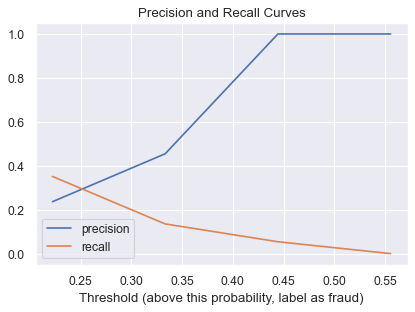

In [239]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, tuned_knn.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is i

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is i

Logistic Regression Model best F1 score 0.588 at prob decision threshold >= 0.359


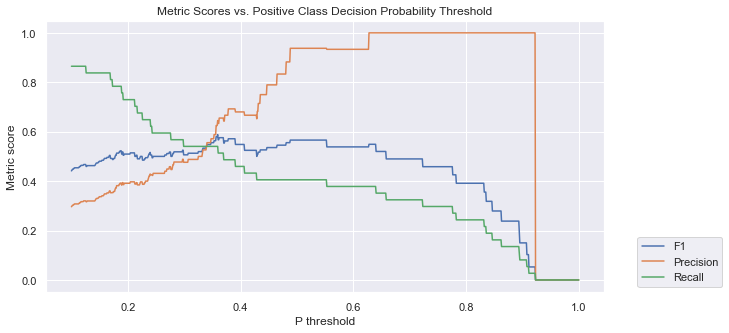

In [276]:
sns.set()

X_te, y_te = X_test, y_test # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,1,1000)
model_te_probs = best_model.predict_proba(X_te)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_te_labels = model_te_probs >= p
    f1_scores.append(f1_score(y_te, model_te_labels))    
    prec_scores.append(precision_score(y_te, model_te_labels))
    rec_scores.append(recall_score(y_te, model_te_labels))
    
plt.figure(figsize=(10,5))    
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)


plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall',], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

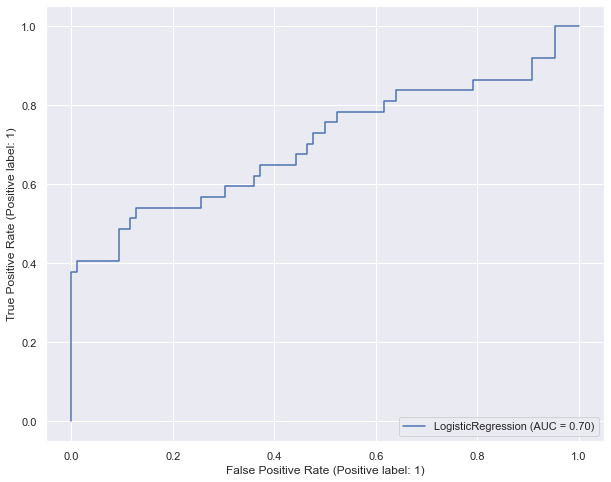

In [272]:
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(10,8)) 
classifiers = [best_model]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)

### Voting Classifier with KNN, Logistic Regression & Random Forest

In [287]:
model_names = ["best_model", "tuned_rf", "tuned_knn"]
model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_vars))

In [282]:
# Get peek at individual test scores

print(f' Logreg Test score: {best_model.score(X_test_std, y_test)}')
print(f' Random forest Test score: {tuned_rf.score(X_test, y_test)}')
print(f' KNN Test score: {tuned_knn.score(X_test, y_test)}')

 Logreg Test score: 0.7804878048780488
 Random forest Test score: 0.8130081300813008
 KNN Test score: 0.7154471544715447


In [289]:



for i in model_names:
    curr_model = eval(i)
    print(f'{i} score: {curr_model.score(X_train, y_train)}')
    print(f'{i} score: {curr_model.score(X_test, y_test)}')

    
model_vars = [eval(n) for n in models]
model_list = list(zip(models, model_vars))

model_list

best_model score: 0.769857433808554
best_model score: 0.7398373983739838
tuned_rf score: 0.8085539714867617
tuned_rf score: 0.8130081300813008
tuned_knn score: 0.6863543788187373
tuned_knn score: 0.7154471544715447


[('best_model', LogisticRegression(C=2.900000000000001)),
 ('tuned_rf',
  RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=8,
                         n_estimators=10, random_state=42)),
 ('tuned_knn', KNeighborsClassifier(n_neighbors=9))]

In [290]:
from sklearn.ensemble import RandomForestRegressor , ExtraTreesClassifier, VotingClassifier

voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='hard', #<-- sklearn calls this hard voting
                                    n_jobs=-1)
voting_classifer.fit(X_train, y_train)

VotingClassifier(estimators=[('best_model',
                              LogisticRegression(C=2.900000000000001)),
                             ('tuned_rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=3,
                                                     min_samples_leaf=8,
                                                     n_estimators=10,
                                                     random_state=42)),
                             ('tuned_knn',
                              KNeighborsClassifier(n_neighbors=9))],
                 n_jobs=-1)

In [291]:
# create voting classifier
weights = [1.5,3.8,4.2] # ارقام افضل وديل تعطيه اهميه و الموديل البترتيب اللي تحطه اول وزن لاول موديل وكذا 
voting_model = VotingClassifier(estimators=model_list,
                                    voting='soft', 
                                    weights = weights,  #include weights
                                    n_jobs=-1)
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('best_model',
                              LogisticRegression(C=2.900000000000001)),
                             ('tuned_rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=3,
                                                     min_samples_leaf=8,
                                                     n_estimators=10,
                                                     random_state=42)),
                             ('tuned_knn',
                              KNeighborsClassifier(n_neighbors=9))],
                 n_jobs=-1, voting='soft', weights=[1.5, 3.8, 4.2])

In [292]:
from sklearn.metrics import r2_score , mean_squared_error ,fbeta_score ,precision_score, recall_score, accuracy_score

# Get accuracy (model to beat: RF with 0.8136 accuracy)
y_pred = voting_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7886178861788617

In [293]:
from mlxtend.classifier import StackingClassifier 

stacked = StackingClassifier(
    classifiers=model_vars, meta_classifier=LogisticRegression(), use_probas=False)

In [294]:
stacked.fit(X_train, y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(classifiers=[LogisticRegression(C=2.900000000000001),
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=3,
                                                       min_samples_leaf=8,
                                                       n_estimators=10,
                                                       random_state=42),
                                KNeighborsClassifier(n_neighbors=9)],
                   meta_classifier=LogisticRegression())

In [295]:
y_pred = stacked.predict(X_test)
accuracy_score(y_test, y_pred)

0.8130081300813008

### Stack

In [296]:
stacked = StackingClassifier(
    classifiers=model_vars, meta_classifier=LogisticRegression(), use_probas=False)
stacked.fit(X_train, y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(classifiers=[LogisticRegression(C=2.900000000000001),
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=3,
                                                       min_samples_leaf=8,
                                                       n_estimators=10,
                                                       random_state=42),
                                KNeighborsClassifier(n_neighbors=9)],
                   meta_classifier=LogisticRegression())

In [134]:
y_pred = stacked.predict(X_test)
accuracy_score(y_test, y_pred)

0.8130081300813008

### xgboost

In [178]:
def rmse(actuals, preds):
    return np.sqrt(((actuals - preds) ** 2).mean())

In [179]:
from sklearn.datasets import fetch_california_housing , load_breast_cancer


In [180]:
import xgboost as xgb 

gbm = xgb.XGBRegressor(
    n_estimators=30000,  #arbitrary large number
    max_depth=7,
    objective="reg:squarederror",
    learning_rate=.05,
    subsample=.8,
    min_child_weight=12,
    colsample_bytree=.7,
    n_jobs=-1,
    random_state=0)

eval_set = [(X_train, y_train),
            (X_test, y_test)]  #tracking train/validation error as we go
fit_model = gbm.fit(
    X_train,
    y_train,
    eval_set=eval_set,
    eval_metric='rmse',
    early_stopping_rounds=50,
    verbose=False)
rmse(gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit), y_test)

C:\Users\dell\Anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


0.20345300047611842

In [181]:
rmse(gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit),y_test) 

0.20345300047611842

In [182]:
gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

eval_set=[(X_train,y_train),(X_val,y_val)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )

accuracy_score(y_val, gbm.predict(X_val, ntree_limit=gbm.best_ntree_limit)) 

C:\Users\dell\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.956140350877193

In [183]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [184]:
model = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic')

In [185]:
from sklearn.model_selection import train_test_split , GridSearchCV ,RandomizedSearchCV


In [186]:
param_comb = 70
random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=10, verbose=3, random_state=42)
random_search.fit(X_train, y_train) 

Fitting 10 folds for each of 70 candidates, totalling 700 fits


C:\Users\dell\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:52:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraint...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                           

In [187]:
print('Best score:')
print(random_search.best_score_)

Best score:
0.9648739495798319


In [188]:
tuned_xgb = random_search.best_estimator_

In [189]:
print(tuned_xgb.score(X_train, y_train))
print(tuned_xgb.score(X_test, y_test))


0.9941348973607038
0.9649122807017544
